In [41]:
import os
from operator import attrgetter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
import skimage.exposure, skimage.measure
import imhandle as imh
import objects_detection as od
import cluster_features as cf
import pixels_features as pf

Оптический диск

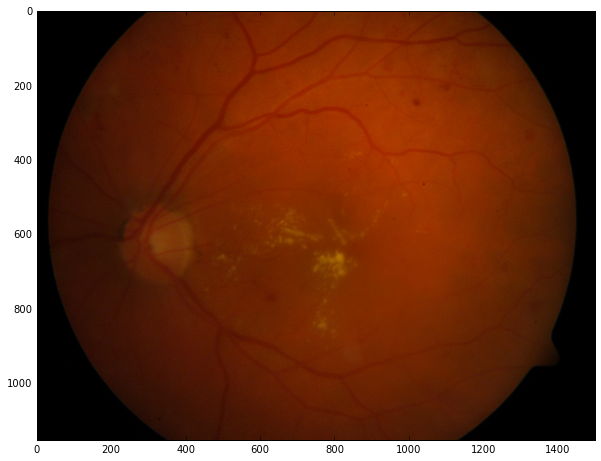

In [22]:
img = imh.load_image('../data/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_fundusimages/image004.png')
imh.show_image(img)

[1714137   10000    3863]


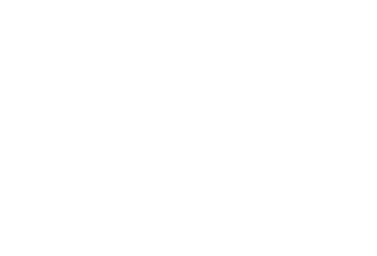

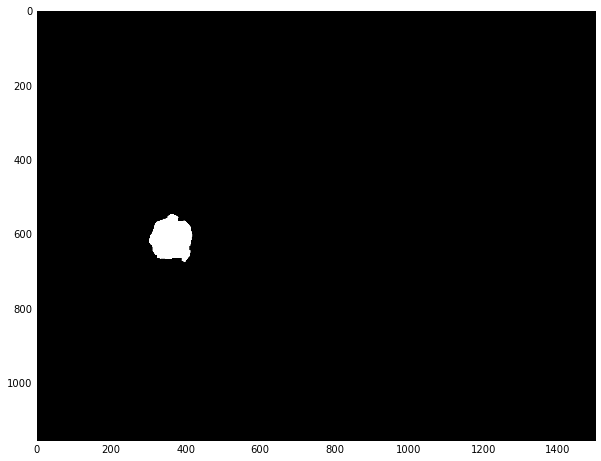

In [23]:
reload(od)
optic_disk_map = od.optic_disk_detect_3(img)
plt.show()
plt.axis('off')
imh.show_image(optic_disk_map)

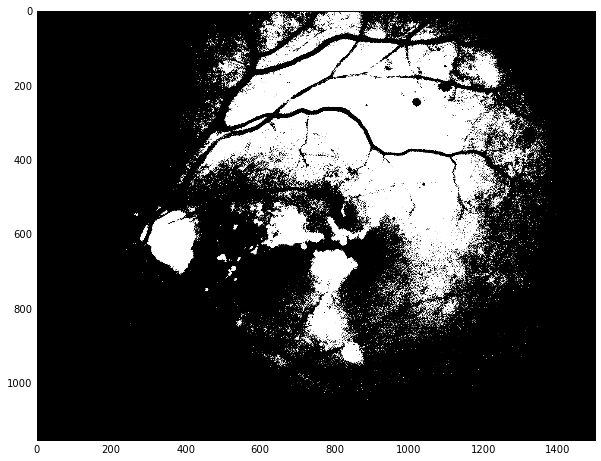

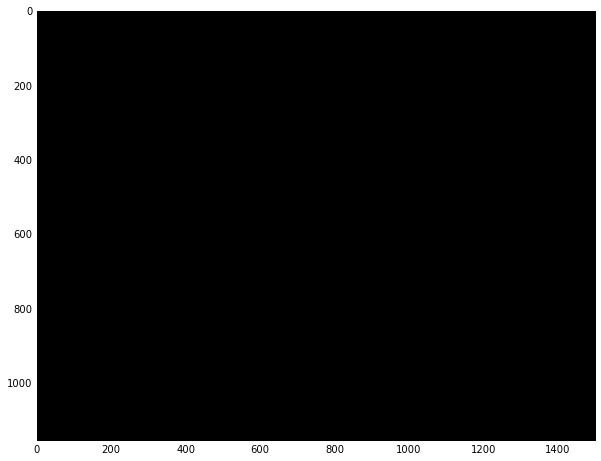

In [43]:
# Jose
green = img[:, :, 1]
clahe = skimage.exposure.equalize_adapthist(green)
imh.show_image(clahe > 0.4)
segm = clahe > 0.4
label = skimage.measure.label(segm)
areas = map(attrgetter('area'), skimage.measure.regionprops(label))
segm2 = label == np.argmax(areas)
imh.show_image(segm2)

(-0.5, 1499.5, 1151.5, -0.5)

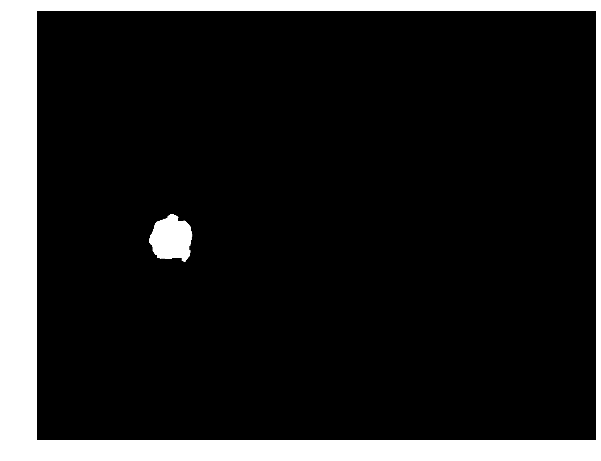

In [14]:
imh.show_image(optic_disk_map)
plt.axis('off')

Сосуды

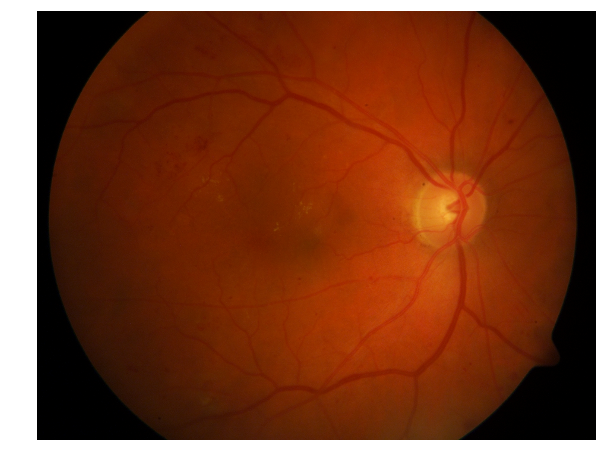

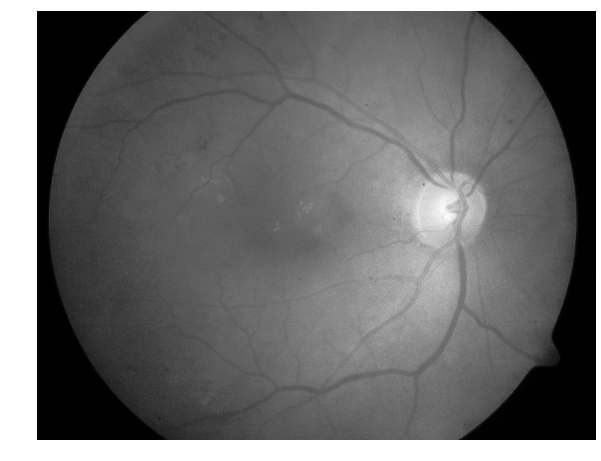

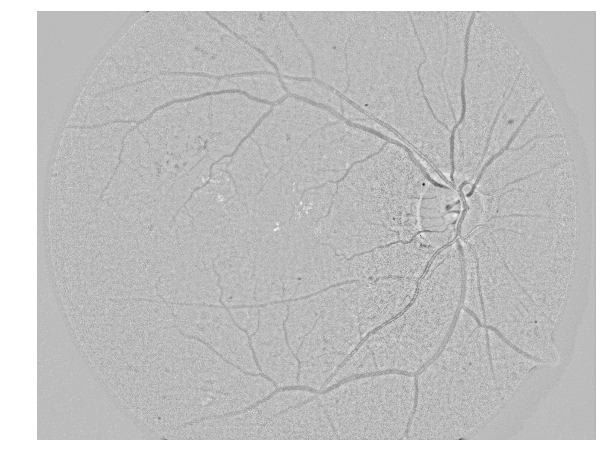

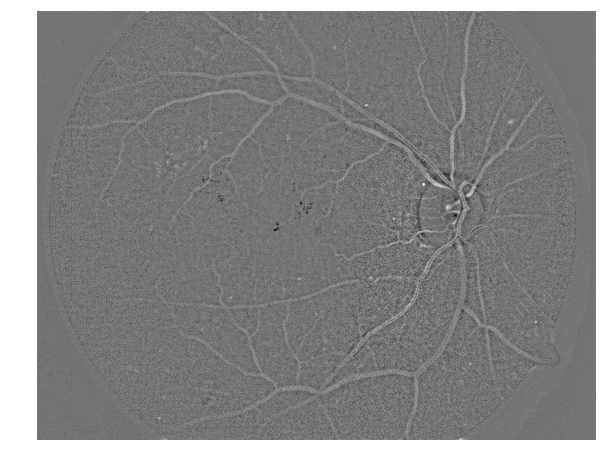

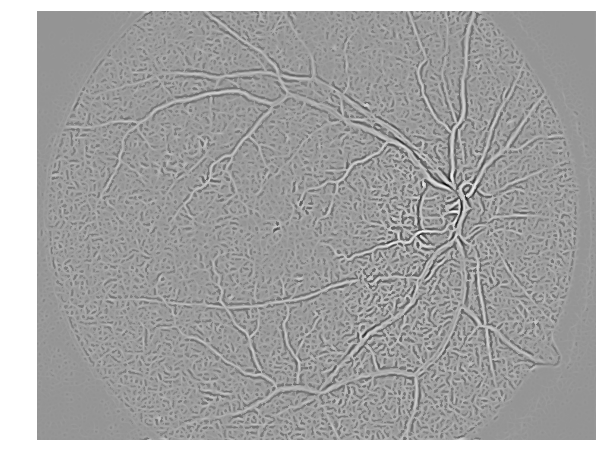

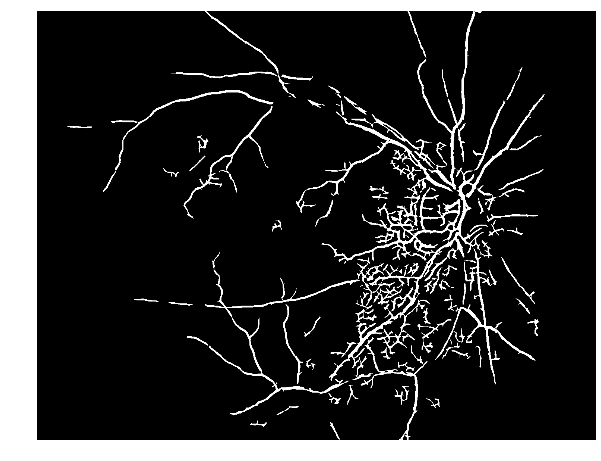

In [34]:
reload(od)
img = imh.load_image('../data/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_fundusimages/image003.png')
imh.show_image(img)
plt.axis('off')
plt.savefig('../presentation/pics/vessels/start.png')

vessels_map = od.detect_vessels_3(img, sigma=15, gabor_perc=91.0)
imh.show_image(vessels_map)
plt.axis('off')
plt.savefig('../presentation/pics/vessels/final.png')

Экссудаты

Геморрагии

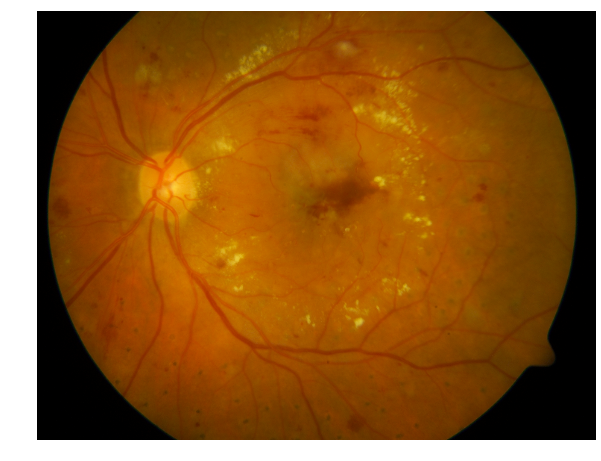

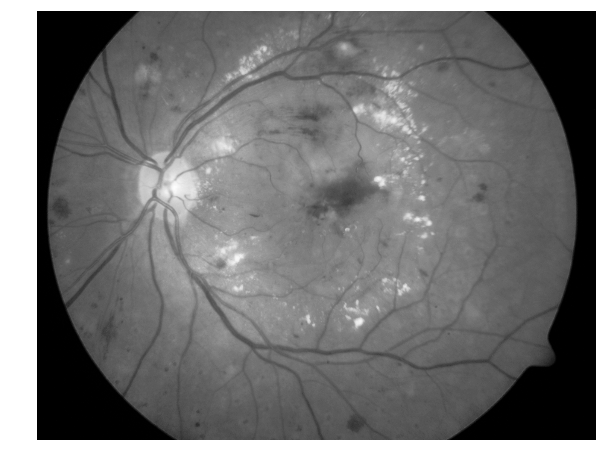

In [20]:
img = imh.load_image('../data/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_fundusimages/image005.png')
imh.show_image(img); plt.axis('off'); plt.savefig('../text final/pics/hemorrhages/start.png')
imh.show_image(img[:, :, 1]); plt.axis('off'); plt.savefig('../text final/pics/hemorrhages/green.png')

Otsu threshold: 0.368643100418


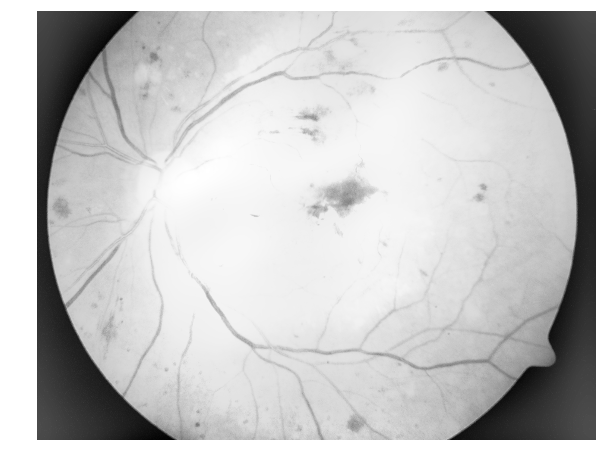

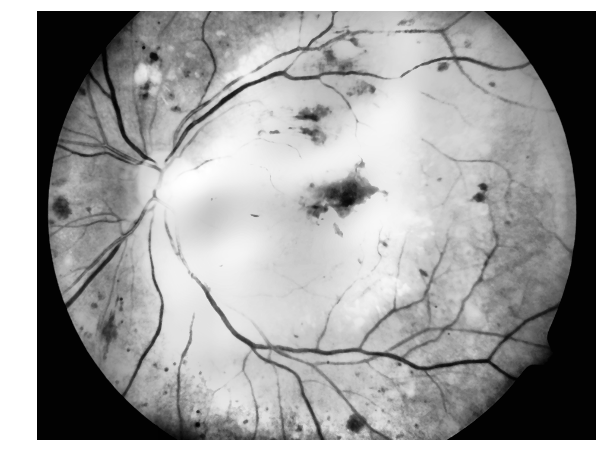

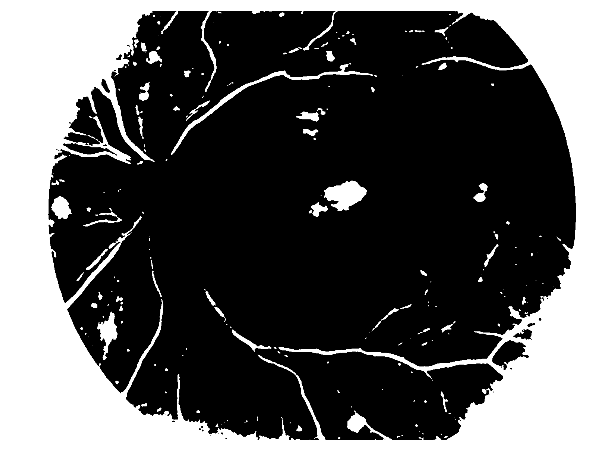

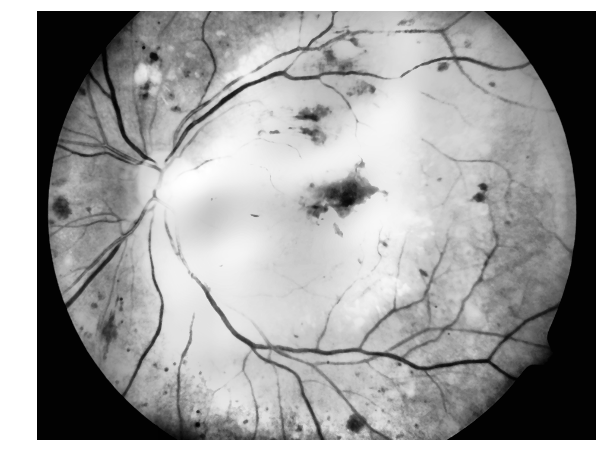

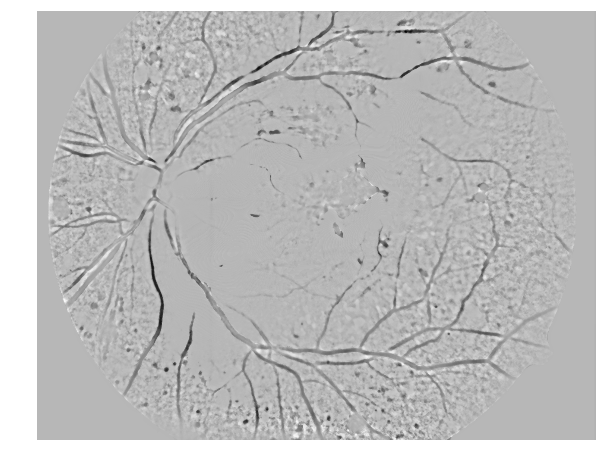

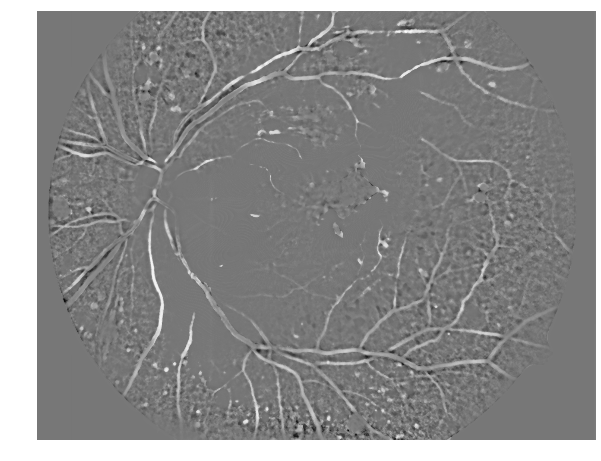

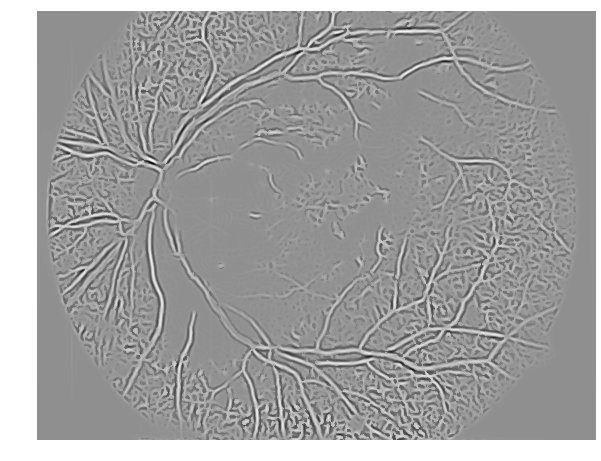

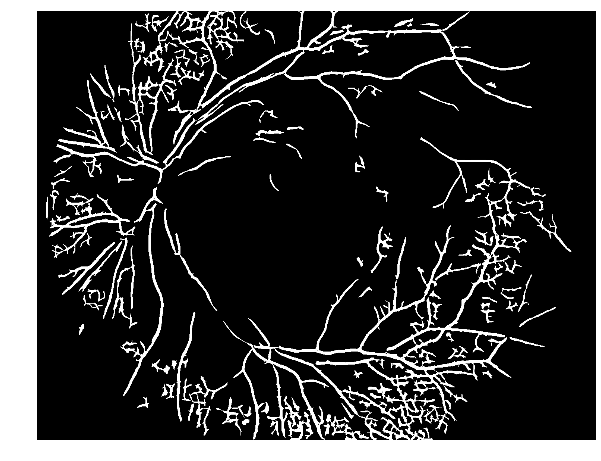

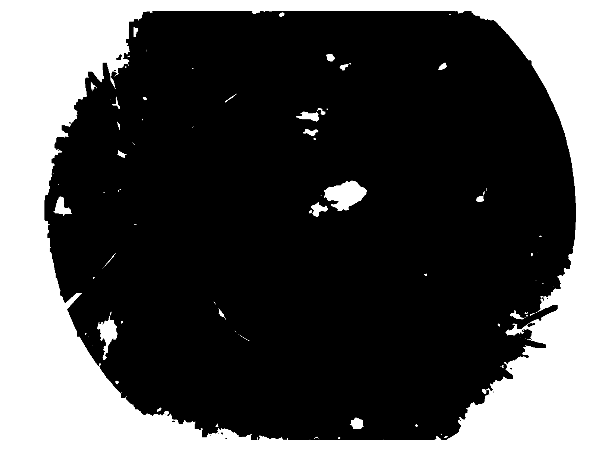

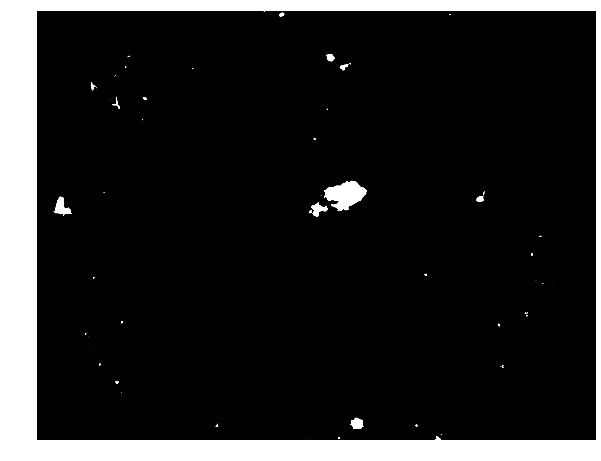

In [21]:
reload(od)
hem = od.hemorrhages_detect(img)
imh.show_image(hem); plt.axis('off'); plt.savefig('../presentation/pics/hemorrhages/final.png')

Экссудаты

[1711061   13824    3115]
radius: 85.2285477408
(486.90858090368937, 725.54851457786367, 995.95120906452962, 1234.5911427387039)
Disk center:  (606.22854774077655, 1115.2711759016167)


AttributeError: 'NoneType' object has no attribute 'predict'

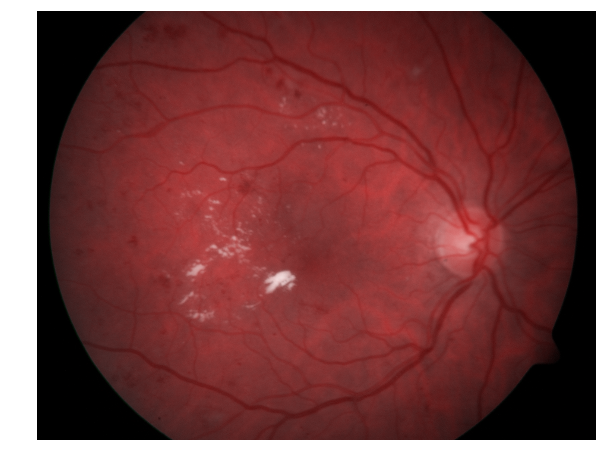

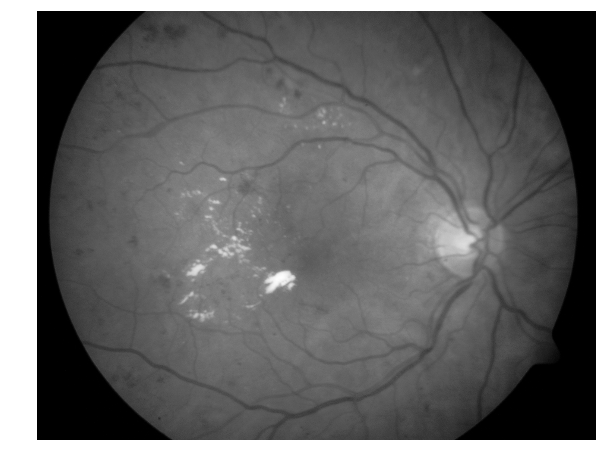

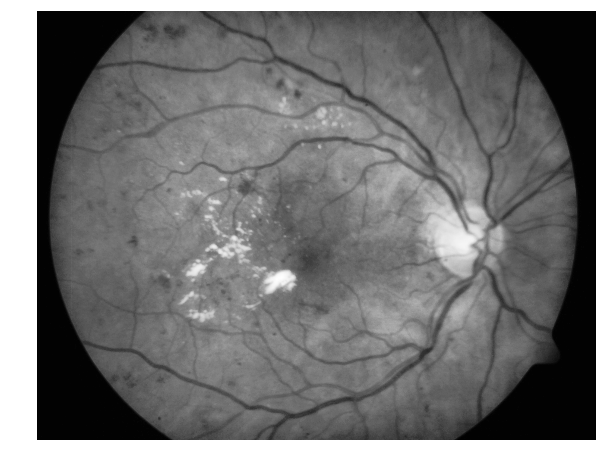

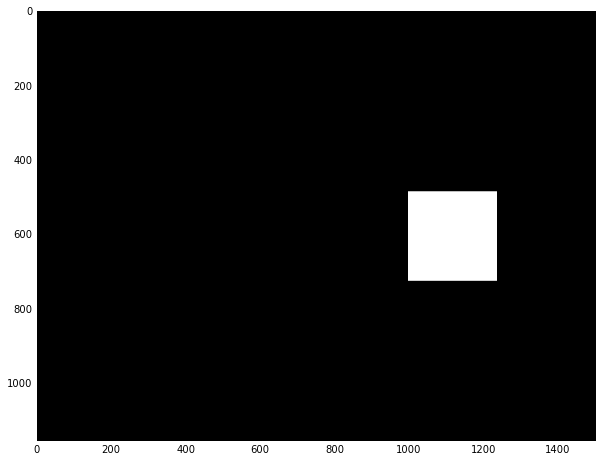

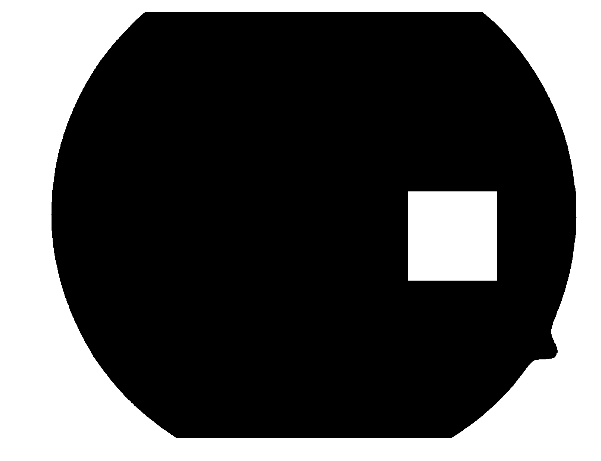

In [29]:
reload(od)
img = imh.load_image('../data/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_fundusimages/image014.png')
imh.show_image(img)
plt.axis('off')
fundus_mask = imh.load_image('../data/DIARETDB1/diaretdb1_v_1_1/resources/images/ddb1_fundusmask/fmask.png')
fundus_mask = (fundus_mask / fundus_mask.max()).astype(int)
exud = od.exudates_detect_3(img, fundus_mask, None, stride_width=6)

Удаление белых краёв

137 564 90 648


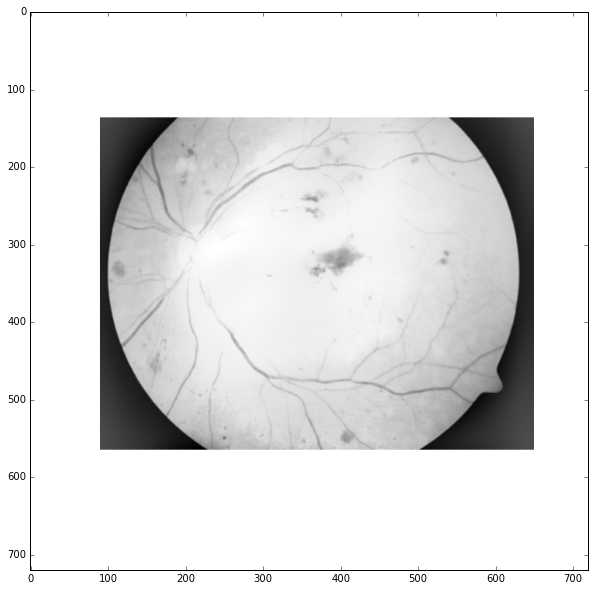

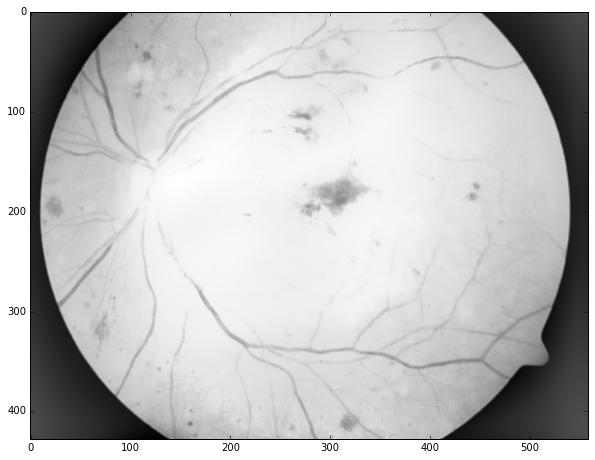

137 564 90 648


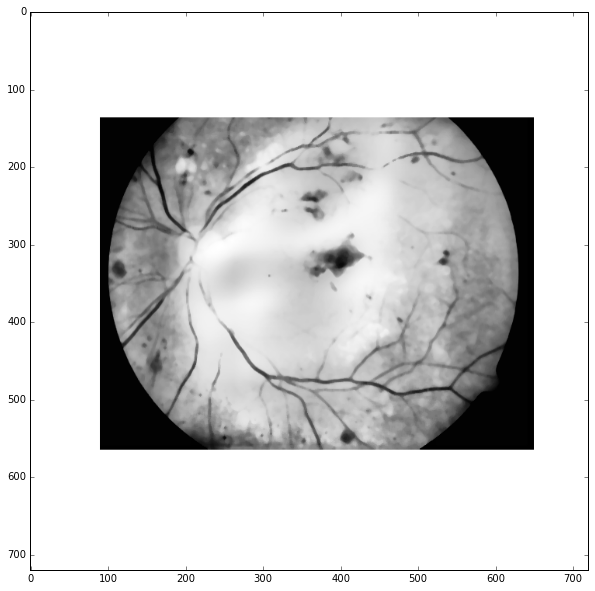

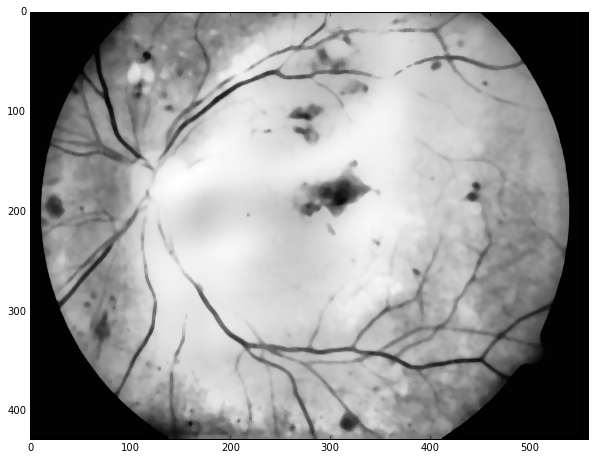

137 564 121 615


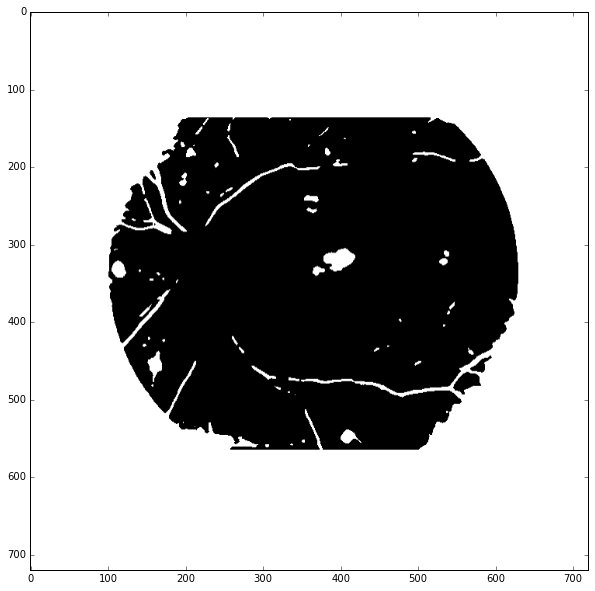

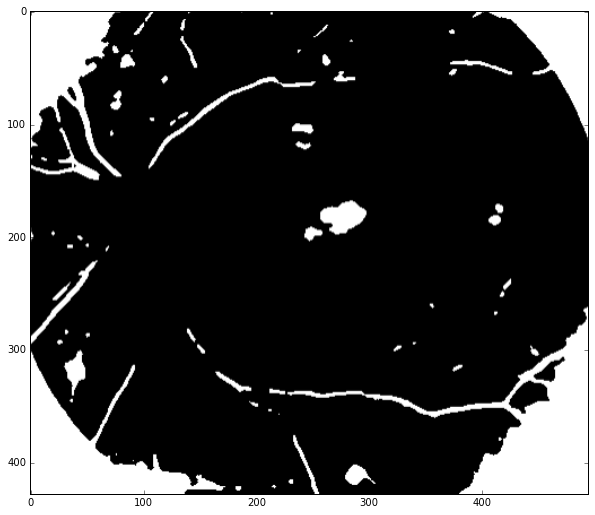

137 564 111 615


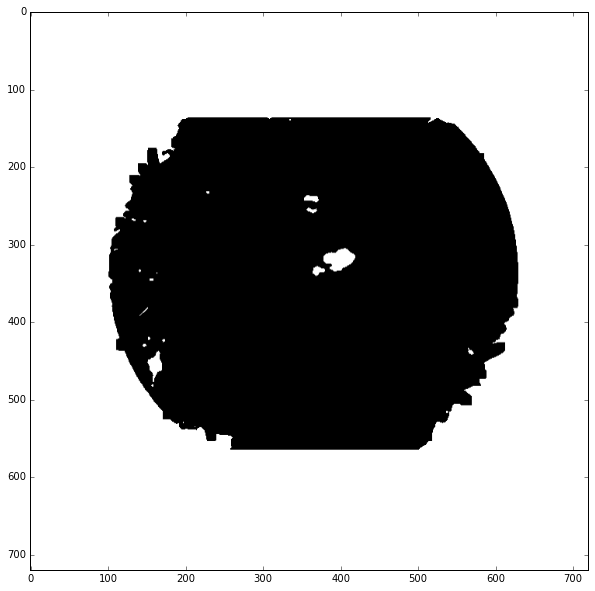

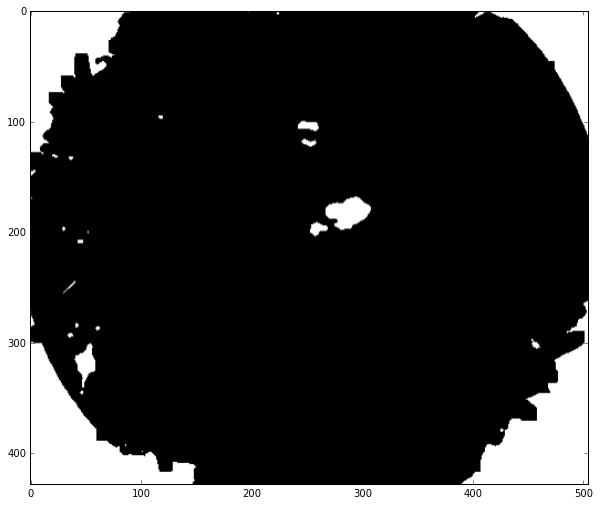

137 564 90 648


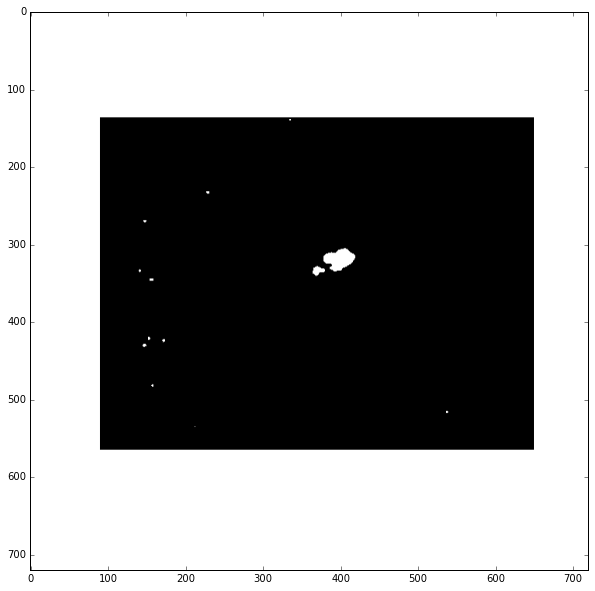

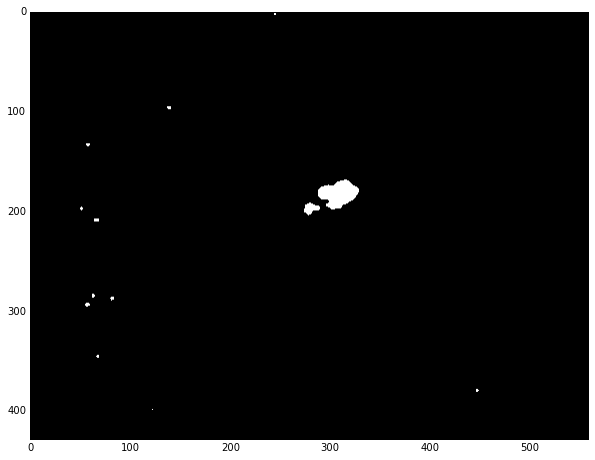

137 564 90 648


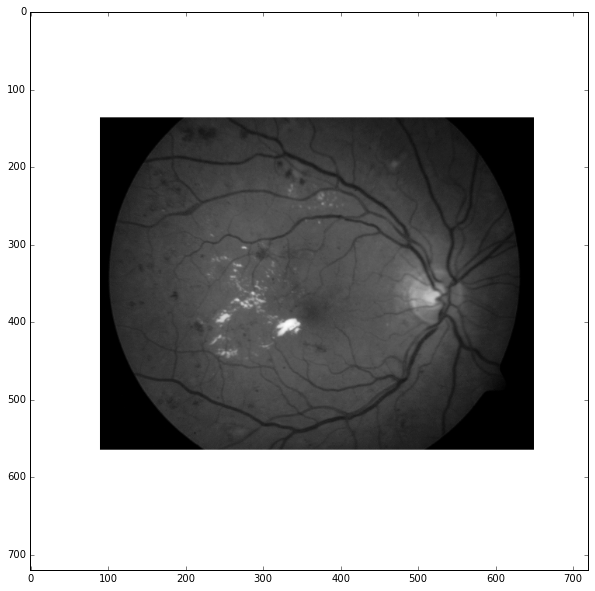

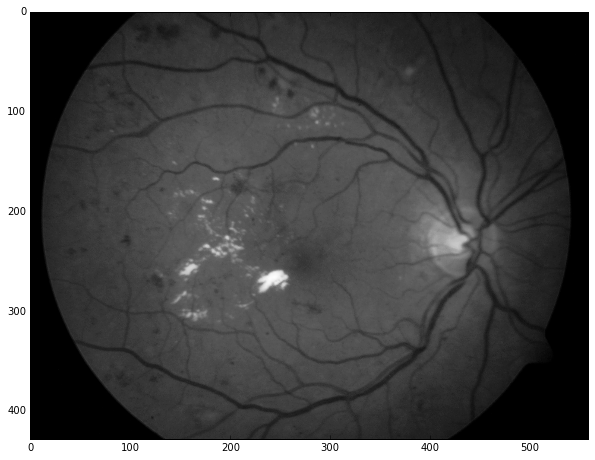

137 564 90 648


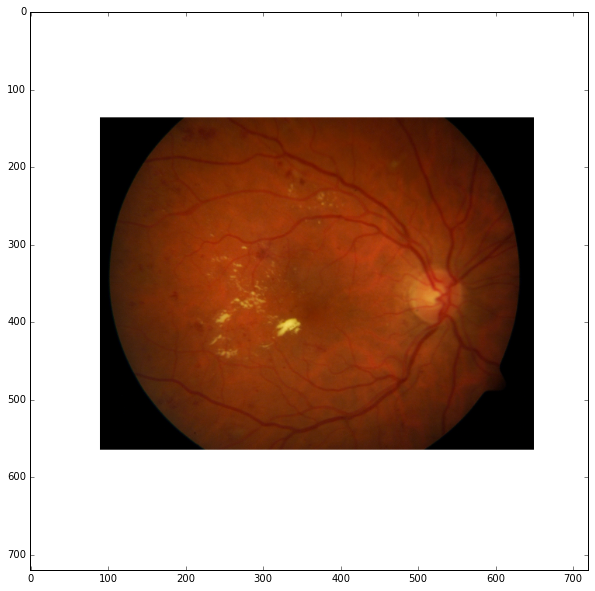

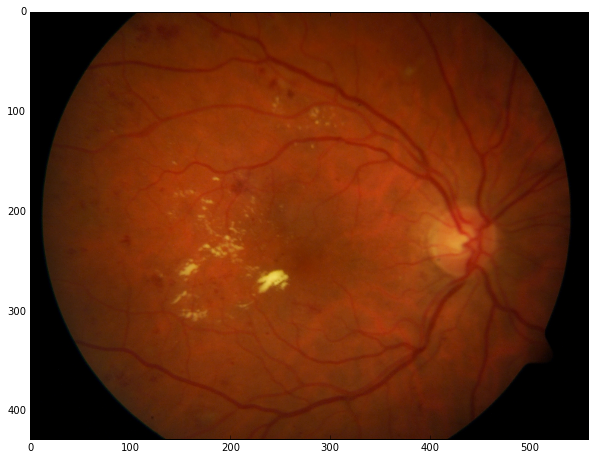

In [19]:
def crop_white_border(img):
    new_img = img.copy()
    row_sums = img.sum(axis=(1, 2))
    top = 0
    while row_sums[top] > 0.85 * img.shape[1] * img.shape[2] and top < img.shape[0]:
        top += 1
    bottom = len(row_sums) - 1
    while row_sums[bottom] > 0.85 * img.shape[1] * img.shape[2] and bottom >= 0:
        bottom -= 1
    
    col_sums = img.sum(axis=(0, 2))
    left = 0
    while col_sums[left] > 0.85 * img.shape[0] * img.shape[2] and left < img.shape[1]:
        left += 1
    right = len(col_sums) - 1
    while col_sums[right] > 0.85 * img.shape[0] * img.shape[2] and right >= 0:
        right -= 1
    new_img = new_img[top:(bottom + 1), left:(right + 1)]
    print top, bottom, left, right
    #print row_sums
    #print col_sums
    return new_img


for img_fn in imh.image_names_in_folder('../text final/pics/hemorrhages/'):
    img = imh.load_image(img_fn)
    img_fn_wo_ext, img_fn_ext = img_fn[:img_fn.rfind('.')], img_fn[img_fn.rfind('.'):]
    if not img_fn_wo_ext.endswith('_1'):
        imh.show_image(img)
        new_img = crop_white_border(img)
        #new_img = img[4:433, 30:587]
        imh.save_image(img_fn_wo_ext + '_1' + img_fn_ext, new_img)
        imh.show_image(new_img)
        plt.show()

In [16]:
img

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,